### Imports

In [135]:
import warnings
warnings.filterwarnings("ignore")

import sys
import numpy as np

np.random.seed(42)
%matplotlib inline

In [136]:
import ipynb
import importlib

In [137]:
import ipynb.fs.full.modules.Environment as Environment
import ipynb.fs.full.modules.Bees as Bees
import ipynb.fs.full.modules.Utils as Utils

## Parameters for Classes

In [189]:
environment_params = {
    "x_min"      : -3,
    "x_max"      : 3,
    "dx"         : 0.01,
    "t_min"      : 0,
    "t_max"      : 5,
    "dt"         : 0.05,
    "D"          : 0.6,
    "decay_rate" : 18.0
}

In [190]:
queen_params = {
    "num"                : -1,
    "x"                  : 0,
    "y"                  : 0,
    "A"                  : 0.15,
    "wb"                 : 0,
    "emission_frequency" : 20,
}

# RUN

In [198]:
def create_bees(space_constrain=0.85):
#     np.random.seed(10)
    bees = []
    for bee_i in range(70):
        bee_params = {
            "x"           : np.random.uniform(environment.x_min*space_constrain, environment.x_max*space_constrain),
            "y"           : np.random.uniform(environment.x_min*space_constrain, environment.x_max*space_constrain),
            "A"           : 0.15,
            "threshold"   : 0.050,
            "wb"          : 0.0,
            "wait_period" : 20,     # Wait when T is met before moving up gradient or reactivate T
            "step_size"   : 0.05,  
            "state"       : "random_walk",
            "num"         : bee_i
        }
        bee = Bees.Worker(bee_params)
        bees.append(bee)
    return bees

In [199]:
np.random.seed(42)

PLOTTING_ON = True

importlib.reload(Environment)
importlib.reload(Bees)
importlib.reload(Utils)

# CREATE CLASS OBJECTS
# ------------------------------------------------------------
environment = Environment.Environment(environment_params)
queen_bee = Bees.Queen(queen_params)
bees = create_bees()
# ------------------------------------------------------------

# Cleanup previous pngs
!rm debug_bias/t*.png

# ============================================================
try:
    for global_i, t_i in enumerate(environment):
        sys.stdout.write(f"\rTimestep: {global_i+1}/{environment.t_grid.shape[0]}")
        sys.stdout.flush()

        # Step 1: Check for and build sources list for current timestep
        # ----------------------------------------------------
        # Update pheromone list from queen bee
        environment.update_pheromone_sources(queen_bee, t_i)

        # Update pheromone list from worker bees
        for bee_i, bee in enumerate(bees):
            environment.update_pheromone_sources(bee, t_i)
        # ----------------------------------------------------

        # Step 2: Build Concentration map and get gradients
        # ----------------------------------------------------
        # Init concentration map for current timestep to 0's
        # environment.init_concentration_map()
        # Iterate through pheromone sources and build concentration maps
        # -- for each pheromone source, calculate gradient for each bee
        for pheromone_src in environment.pheromone_sources:
            # Update concentration map with x, y, A, dt, etc.
            environment.update_concentration_map(t_i, pheromone_src)    

            ####################################
            # Save single source maps
            ####################################

            # Iterate through list of active bees and calculate gradient
            for bee in bees:
                grad = environment.calculate_gradient(t_i, bee.x, bee.y, pheromone_src)
                bee.update_gradient(grad)
        # ----------------------------------------------------
        environment.update()

        # Step 3: Update bees & environment
        # ----------------------------------------------------
        queen_bee.update()

        for bee in bees:
            # Check if bee's threshold is met then update based on state
            bee.check_threshold(environment)
            bee.update(environment)
        # ----------------------------------------------------

        # Plotting
        if PLOTTING_ON:
            Utils.plot(global_i, queen_bee, bees, environment, max_conc=0.6, bees_to_vis=None)
except KeyboardInterrupt:
    print("\nEnding early.")
    

Creating concentration map...
Creating timecourse...
Timestep: 100/100

In [200]:
VID_PATH = "debug_bias/D0.2_T0.050.mp4"

In [201]:
# !convert -delay 25 test_classes/test_t*.png test_classes/Q0.15_W0.15_D0.2_T0.2_wb0.0_decay0.5.mp4
!convert -delay 25 debug_bias/t*.png $VID_PATH

In [99]:
VLC = "/Applications/VLC.app/Contents/MacOS/VLC"
!$VLC $VID_PATH

VLC media player 3.0.4 Vetinari (revision 3.0.4-0-gf615db6332)
[00007f8f21d1c180] main libvlc: Running vlc with the default interface. Use 'cvlc' to use vlc without interface.
[00007f8f21ef8fb0] cache_read stream error: cannot pre fill buffer
[00007f8f21c94840] mjpeg demux error: cannot peek
[00007f8f21fb30d0] cache_read stream error: cannot pre fill buffer
[00007f8f21eec9b0] mjpeg demux error: cannot peek
[00007f8f24788030] cache_read stream error: cannot pre fill buffer
[00007f8f21f84eb0] mjpeg demux error: cannot peek
[00007f8f246683b0] cache_read stream error: cannot pre fill buffer
[00007f8f21ef2070] mjpeg demux error: cannot peek
[00007f8f21dbe870] cache_read stream error: cannot pre fill buffer
[00007f8f21dbb8e0] mjpeg demux error: cannot peek
[00007f8f21cdbcf0] cache_read stream error: cannot pre fill buffer
[00007f8f2478b870] mjpeg demux error: cannot peek
[00007f8f21d750a0] cache_read stream error: cannot pre fill buffer
[00007f8f21fb8e70] mjpeg demux error: cannot peek
[0000

[00007f8f21fe4600] mjpeg demux error: cannot peek
[00007f8f25804fe0] cache_read stream error: cannot pre fill buffer
[00007f8f247baef0] mjpeg demux error: cannot peek
[00007f8f24778c00] cache_read stream error: cannot pre fill buffer
[00007f8f247baef0] mjpeg demux error: cannot peek
[00007f8f247a8360] cache_read stream error: cannot pre fill buffer
[00007f8f21ef58f0] mjpeg demux error: cannot peek
[00007f8f21ff9570] cache_read stream error: cannot pre fill buffer
[00007f8f25804510] mjpeg demux error: cannot peek
[00007f8f24674ed0] cache_read stream error: cannot pre fill buffer
[00007f8f258027e0] mjpeg demux error: cannot peek
[00007f8f21dcda40] cache_read stream error: cannot pre fill buffer
[00007f8f2467b540] mjpeg demux error: cannot peek
[00007f8f2467bf70] cache_read stream error: cannot pre fill buffer
[00007f8f25804fe0] mjpeg demux error: cannot peek
[00007f8f21d55c80] cache_read stream error: cannot pre fill buffer
[00007f8f21d55c80] mjpeg demux error: cannot peek
[00007f8f21d55

[00007f8f247bca20] mjpeg demux error: cannot peek
[00007f8f247c22d0] cache_read stream error: cannot pre fill buffer
[00007f8f21dddbc0] mjpeg demux error: cannot peek
[00007f8f21da3c20] cache_read stream error: cannot pre fill buffer
[00007f8f24685360] mjpeg demux error: cannot peek
[00007f8f247a7450] cache_read stream error: cannot pre fill buffer
[00007f8f21ff07d0] mjpeg demux error: cannot peek
[00007f8f21dd3580] cache_read stream error: cannot pre fill buffer
[00007f8f25806510] mjpeg demux error: cannot peek
[00007f8f21ff2120] cache_read stream error: cannot pre fill buffer
[00007f8f21dd3580] mjpeg demux error: cannot peek
[00007f8f21da4150] cache_read stream error: cannot pre fill buffer
[00007f8f21da4310] mjpeg demux error: cannot peek
[00007f8f21da4440] cache_read stream error: cannot pre fill buffer
[00007f8f21ff07d0] mjpeg demux error: cannot peek
[00007f8f21db9170] cache_read stream error: cannot pre fill buffer
[00007f8f21db90b0] mjpeg demux error: cannot peek
[00007f8f247db

[00007f8f2468ae50] mjpeg demux error: cannot peek
[00007f8f258066c0] cache_read stream error: cannot pre fill buffer
[00007f8f247adac0] mjpeg demux error: cannot peek
[00007f8f247d2ca0] cache_read stream error: cannot pre fill buffer
[00007f8f258027e0] mjpeg demux error: cannot peek
[00007f8f21ddfe40] cache_read stream error: cannot pre fill buffer
[00007f8f247adac0] mjpeg demux error: cannot peek
[00007f8f247c1390] cache_read stream error: cannot pre fill buffer
[00007f8f24670de0] mjpeg demux error: cannot peek
[00007f8f24689220] cache_read stream error: cannot pre fill buffer
[00007f8f258040b0] mjpeg demux error: cannot peek
[00007f8f247db590] cache_read stream error: cannot pre fill buffer
[00007f8f21ffbdf0] mjpeg demux error: cannot peek
[00007f8f247a8390] cache_read stream error: cannot pre fill buffer
[00007f8f2580ec50] mjpeg demux error: cannot peek
[00007f8f21ddfc20] cache_read stream error: cannot pre fill buffer
[00007f8f21dd9bd0] mjpeg demux error: cannot peek
[00007f8f247d3

[00007f8f21de1100] mjpeg demux error: cannot peek
[00007f8f21dcb650] cache_read stream error: cannot pre fill buffer
[00007f8f21cc41b0] mjpeg demux error: cannot peek
[00007f8f2468f090] cache_read stream error: cannot pre fill buffer
[00007f8f2468ce90] mjpeg demux error: cannot peek
[00007f8f25803b10] cache_read stream error: cannot pre fill buffer
[00007f8f247d3110] mjpeg demux error: cannot peek
[00007f8f25803b10] cache_read stream error: cannot pre fill buffer
[00007f8f2467b740] mjpeg demux error: cannot peek
[00007f8f24689a80] cache_read stream error: cannot pre fill buffer
[00007f8f24689220] mjpeg demux error: cannot peek
[00007f8f21ff2120] cache_read stream error: cannot pre fill buffer
[00007f8f21dd3350] mjpeg demux error: cannot peek
[00007f8f21ff2120] cache_read stream error: cannot pre fill buffer
[00007f8f21dcc320] mjpeg demux error: cannot peek
[00007f8f21da8820] cache_read stream error: cannot pre fill buffer
[00007f8f21ffb390] mjpeg demux error: cannot peek
[00007f8f21dcb

[00007f8f21ec7020] mjpeg demux error: cannot peek
[00007f8f24683ec0] cache_read stream error: cannot pre fill buffer
[00007f8f25808520] mjpeg demux error: cannot peek
[00007f8f21d8ad20] cache_read stream error: cannot pre fill buffer
[00007f8f21ec7020] mjpeg demux error: cannot peek
[00007f8f25808cf0] cache_read stream error: cannot pre fill buffer
[00007f8f21dd2c50] mjpeg demux error: cannot peek
[00007f8f2467f550] cache_read stream error: cannot pre fill buffer
[00007f8f2468cf60] mjpeg demux error: cannot peek
[00007f8f247e0410] cache_read stream error: cannot pre fill buffer
[00007f8f2580ce20] mjpeg demux error: cannot peek
[00007f8f2580ce20] cache_read stream error: cannot pre fill buffer
[00007f8f2468b800] mjpeg demux error: cannot peek
[00007f8f21dba1f0] cache_read stream error: cannot pre fill buffer
[00007f8f21ddbfd0] mjpeg demux error: cannot peek
[00007f8f247e0410] cache_read stream error: cannot pre fill buffer
[00007f8f21fe77c0] mjpeg demux error: cannot peek
[00007f8f247d3

[00007f8f21da57e0] mjpeg demux error: cannot peek
[00007f8f247e0b00] cache_read stream error: cannot pre fill buffer
[00007f8f25808e00] mjpeg demux error: cannot peek
[00007f8f2468cf60] cache_read stream error: cannot pre fill buffer
[00007f8f25808e00] mjpeg demux error: cannot peek
[00007f8f2580e1a0] cache_read stream error: cannot pre fill buffer
[00007f8f2580e360] mjpeg demux error: cannot peek
[00007f8f21dde550] cache_read stream error: cannot pre fill buffer
[00007f8f25808e00] mjpeg demux error: cannot peek
[00007f8f24697360] cache_read stream error: cannot pre fill buffer
[00007f8f24697520] mjpeg demux error: cannot peek
[00007f8f247e19a0] cache_read stream error: cannot pre fill buffer
[00007f8f24695060] mjpeg demux error: cannot peek
[00007f8f21ff9d60] cache_read stream error: cannot pre fill buffer
[00007f8f21ddaba0] mjpeg demux error: cannot peek
[00007f8f21ddaba0] cache_read stream error: cannot pre fill buffer
[00007f8f247d44c0] mjpeg demux error: cannot peek
[00007f8f21dbb

[00007f8f21daa140] mjpeg demux error: cannot peek
[00007f8f247d3120] cache_read stream error: cannot pre fill buffer
[00007f8f21d9d090] mjpeg demux error: cannot peek
[00007f8f21d98c10] cache_read stream error: cannot pre fill buffer
[00007f8f247e1c30] mjpeg demux error: cannot peek
[00007f8f2468e700] cache_read stream error: cannot pre fill buffer
[00007f8f24691cf0] mjpeg demux error: cannot peek
[00007f8f24697a00] cache_read stream error: cannot pre fill buffer
[00007f8f2468df20] mjpeg demux error: cannot peek
[00007f8f2580a190] cache_read stream error: cannot pre fill buffer
[00007f8f247e4090] mjpeg demux error: cannot peek
[00007f8f21d749f0] cache_read stream error: cannot pre fill buffer
[00007f8f21d749f0] mjpeg demux error: cannot peek
[00007f8f25809b00] cache_read stream error: cannot pre fill buffer
[00007f8f24689130] mjpeg demux error: cannot peek
[00007f8f247d3120] cache_read stream error: cannot pre fill buffer
[00007f8f25814210] mjpeg demux error: cannot peek
[00007f8f2468e

[00007f8f2580c980] mjpeg demux error: cannot peek
[00007f8f247d66c0] cache_read stream error: cannot pre fill buffer
[00007f8f247d2cf0] mjpeg demux error: cannot peek
[00007f8f2468f3b0] cache_read stream error: cannot pre fill buffer
[00007f8f2580b7f0] mjpeg demux error: cannot peek
[00007f8f247d66c0] cache_read stream error: cannot pre fill buffer
[00007f8f247e3f20] mjpeg demux error: cannot peek
[00007f8f258193a0] cache_read stream error: cannot pre fill buffer
[00007f8f247e9670] mjpeg demux error: cannot peek
[00007f8f2469a860] cache_read stream error: cannot pre fill buffer
[00007f8f2467f270] mjpeg demux error: cannot peek
[00007f8f25818ba0] cache_read stream error: cannot pre fill buffer
[00007f8f21dba1f0] mjpeg demux error: cannot peek
[00007f8f2581ae30] cache_read stream error: cannot pre fill buffer
[00007f8f247e9820] mjpeg demux error: cannot peek
[00007f8f21d99230] cache_read stream error: cannot pre fill buffer
[00007f8f21dbe560] mjpeg demux error: cannot peek
[00007f8f2581a

[00007f8f21dd3480] mjpeg demux error: cannot peek
[00007f8f21dd1980] cache_read stream error: cannot pre fill buffer
[00007f8f21de6950] mjpeg demux error: cannot peek
[00007f8f21d9c720] cache_read stream error: cannot pre fill buffer
[00007f8f21d9c820] mjpeg demux error: cannot peek
[00007f8f247eb660] cache_read stream error: cannot pre fill buffer
[00007f8f2581ad90] mjpeg demux error: cannot peek
[00007f8f246960d0] cache_read stream error: cannot pre fill buffer
[00007f8f25819ab0] mjpeg demux error: cannot peek
[00007f8f247e7e30] cache_read stream error: cannot pre fill buffer
[00007f8f258210c0] mjpeg demux error: cannot peek
[00007f8f246978a0] cache_read stream error: cannot pre fill buffer
[00007f8f24695260] mjpeg demux error: cannot peek
[00007f8f258210c0] cache_read stream error: cannot pre fill buffer
[00007f8f2581b450] mjpeg demux error: cannot peek
[00007f8f247e9500] cache_read stream error: cannot pre fill buffer
[00007f8f2581b450] mjpeg demux error: cannot peek
[00007f8f24696

[00007f8f21db8350] cache_read stream error: cannot pre fill buffer
[00007f8f24696da0] mjpeg demux error: cannot peek
[00007f8f258111b0] cache_read stream error: cannot pre fill buffer
[00007f8f21de5900] mjpeg demux error: cannot peek
[00007f8f247f1e90] cache_read stream error: cannot pre fill buffer
[00007f8f2469fbf0] mjpeg demux error: cannot peek
[00007f8f247f1b90] cache_read stream error: cannot pre fill buffer
[00007f8f2469eff0] mjpeg demux error: cannot peek
[00007f8f2469f3a0] cache_read stream error: cannot pre fill buffer
[00007f8f21d9dab0] mjpeg demux error: cannot peek
[00007f8f246a03b0] cache_read stream error: cannot pre fill buffer
[00007f8f247f45b0] mjpeg demux error: cannot peek
[00007f8f247d4180] cache_read stream error: cannot pre fill buffer
[00007f8f21d90cb0] mjpeg demux error: cannot peek
[00007f8f246a03b0] cache_read stream error: cannot pre fill buffer
[00007f8f21db9180] mjpeg demux error: cannot peek
[00007f8f21de4cf0] cache_read stream error: cannot pre fill buff

[00007f8f25819ab0] mjpeg demux error: cannot peek
[00007f8f2581f550] cache_read stream error: cannot pre fill buffer
[00007f8f21dbe2e0] mjpeg demux error: cannot peek
[00007f8f21d9dbf0] cache_read stream error: cannot pre fill buffer
[00007f8f21dbe2e0] mjpeg demux error: cannot peek
[00007f8f2469f3d0] cache_read stream error: cannot pre fill buffer
[00007f8f247f8460] mjpeg demux error: cannot peek
[00007f8f247f8bf0] cache_read stream error: cannot pre fill buffer
[00007f8f247e3990] mjpeg demux error: cannot peek
[00007f8f247eb1d0] cache_read stream error: cannot pre fill buffer
[00007f8f258219a0] mjpeg demux error: cannot peek
[00007f8f247f8850] cache_read stream error: cannot pre fill buffer
[00007f8f21db8220] mjpeg demux error: cannot peek
[00007f8f247f7ac0] cache_read stream error: cannot pre fill buffer
[00007f8f247f8460] mjpeg demux error: cannot peek
[00007f8f2581c960] cache_read stream error: cannot pre fill buffer
[00007f8f247f9f40] mjpeg demux error: cannot peek
[00007f8f21da8

[00007f8f21d9c640] mjpeg demux error: cannot peek
[00007f8f2582bfa0] cache_read stream error: cannot pre fill buffer
[00007f8f2581ce00] mjpeg demux error: cannot peek
[00007f8f2582ef30] cache_read stream error: cannot pre fill buffer
[00007f8f21da8680] mjpeg demux error: cannot peek
[00007f8f246af810] cache_read stream error: cannot pre fill buffer
[00007f8f25827340] mjpeg demux error: cannot peek
[00007f8f2582ad60] cache_read stream error: cannot pre fill buffer
[00007f8f25905dc0] mjpeg demux error: cannot peek
[00007f8f246b26b0] cache_read stream error: cannot pre fill buffer
[00007f8f25905dc0] mjpeg demux error: cannot peek
[00007f8f246b2500] cache_read stream error: cannot pre fill buffer
[00007f8f247f5a60] mjpeg demux error: cannot peek
[00007f8f21dbe0c0] cache_read stream error: cannot pre fill buffer
[00007f8f2581ce00] mjpeg demux error: cannot peek
[00007f8f259086a0] cache_read stream error: cannot pre fill buffer
[00007f8f2581ce00] mjpeg demux error: cannot peek
[00007f8f246a2

[00007f8f2582acf0] mjpeg demux error: cannot peek
[00007f8f25838d60] cache_read stream error: cannot pre fill buffer
[00007f8f25a011e0] mjpeg demux error: cannot peek
[00007f8f21df9ad0] cache_read stream error: cannot pre fill buffer
[00007f8f25906e90] mjpeg demux error: cannot peek
[00007f8f259023b0] cache_read stream error: cannot pre fill buffer
[00007f8f246a6650] mjpeg demux error: cannot peek
[00007f8f259023b0] cache_read stream error: cannot pre fill buffer
[00007f8f25837e10] mjpeg demux error: cannot peek
[00007f8f24698230] cache_read stream error: cannot pre fill buffer
[00007f8f25832ac0] mjpeg demux error: cannot peek
[00007f8f25835be0] cache_read stream error: cannot pre fill buffer
[00007f8f25a01c90] mjpeg demux error: cannot peek
[00007f8f25835be0] cache_read stream error: cannot pre fill buffer
[00007f8f25906e90] mjpeg demux error: cannot peek
[00007f8f25905680] cache_read stream error: cannot pre fill buffer
[00007f8f25906e90] mjpeg demux error: cannot peek
[00007f8f246a1

[00007f8f2590ca00] cache_read stream error: cannot pre fill buffer
[00007f8f21dbe0c0] mjpeg demux error: cannot peek
[00007f8f25835be0] cache_read stream error: cannot pre fill buffer
[00007f8f21dec600] mjpeg demux error: cannot peek
[00007f8f25835be0] cache_read stream error: cannot pre fill buffer
[00007f8f25832030] mjpeg demux error: cannot peek
[00007f8f25835be0] cache_read stream error: cannot pre fill buffer
[00007f8f21dedfe0] mjpeg demux error: cannot peek
[00007f8f25834fa0] cache_read stream error: cannot pre fill buffer
[00007f8f25832030] mjpeg demux error: cannot peek
[00007f8f2590cd70] cache_read stream error: cannot pre fill buffer
[00007f8f246a9550] mjpeg demux error: cannot peek
[00007f8f2590cd70] cache_read stream error: cannot pre fill buffer
[00007f8f25907190] mjpeg demux error: cannot peek
[00007f8f21df9270] cache_read stream error: cannot pre fill buffer
[00007f8f246b3fa0] mjpeg demux error: cannot peek
[00007f8f25912540] cache_read stream error: cannot pre fill buff

[00007f8f25834c30] mjpeg demux error: cannot peek
[00007f8f21d8b350] cache_read stream error: cannot pre fill buffer
[00007f8f25909960] mjpeg demux error: cannot peek
[00007f8f21d8b350] cache_read stream error: cannot pre fill buffer
[00007f8f2590f650] mjpeg demux error: cannot peek
[00007f8f25907120] cache_read stream error: cannot pre fill buffer
[00007f8f25900fc0] mjpeg demux error: cannot peek
[00007f8f2590c940] cache_read stream error: cannot pre fill buffer
[00007f8f246b9030] mjpeg demux error: cannot peek
[00007f8f246b9b30] cache_read stream error: cannot pre fill buffer
[00007f8f21dec3d0] mjpeg demux error: cannot peek
[00007f8f25a05bc0] cache_read stream error: cannot pre fill buffer
[00007f8f246b9030] mjpeg demux error: cannot peek
[00007f8f246a79d0] cache_read stream error: cannot pre fill buffer
[00007f8f246a7b90] mjpeg demux error: cannot peek
[00007f8f2590c940] cache_read stream error: cannot pre fill buffer
[00007f8f2582fcd0] mjpeg demux error: cannot peek
[00007f8f246b2

[00007f8f21dbe0c0] mjpeg demux error: cannot peek
[00007f8f247ec960] cache_read stream error: cannot pre fill buffer
[00007f8f247ec960] mjpeg demux error: cannot peek
[00007f8f246b7a30] cache_read stream error: cannot pre fill buffer
[00007f8f246b1c70] mjpeg demux error: cannot peek
[00007f8f2583cfa0] cache_read stream error: cannot pre fill buffer
[00007f8f21e46980] mjpeg demux error: cannot peek
[00007f8f21deb780] cache_read stream error: cannot pre fill buffer
[00007f8f21dbe0c0] mjpeg demux error: cannot peek
[00007f8f21c2d760] cache_read stream error: cannot pre fill buffer
[00007f8f21ded750] mjpeg demux error: cannot peek
[00007f8f21e46530] cache_read stream error: cannot pre fill buffer
[00007f8f21debba0] mjpeg demux error: cannot peek
[00007f8f246afd10] cache_read stream error: cannot pre fill buffer
[00007f8f259137d0] mjpeg demux error: cannot peek
[00007f8f21e478c0] cache_read stream error: cannot pre fill buffer
[00007f8f21dbe0c0] mjpeg demux error: cannot peek
[00007f8f246b7

[00007f8f21dfb230] mjpeg demux error: cannot peek
[00007f8f246b3ff0] cache_read stream error: cannot pre fill buffer
[00007f8f21decf30] mjpeg demux error: cannot peek
[00007f8f246ae3c0] cache_read stream error: cannot pre fill buffer
[00007f8f246b4c60] mjpeg demux error: cannot peek
[00007f8f25832580] cache_read stream error: cannot pre fill buffer
[00007f8f25a05700] mjpeg demux error: cannot peek
[00007f8f259155f0] cache_read stream error: cannot pre fill buffer
[00007f8f25911500] mjpeg demux error: cannot peek
[00007f8f25832580] cache_read stream error: cannot pre fill buffer
[00007f8f25a05700] mjpeg demux error: cannot peek
[00007f8f21dec990] cache_read stream error: cannot pre fill buffer
[00007f8f25840510] mjpeg demux error: cannot peek
[00007f8f2591c980] cache_read stream error: cannot pre fill buffer
[00007f8f21c1f450] mjpeg demux error: cannot peek
[00007f8f246b5a40] cache_read stream error: cannot pre fill buffer
[00007f8f2583aed0] mjpeg demux error: cannot peek
[00007f8f25a0a

[00007f8f21dec3f0] mjpeg demux error: cannot peek
[00007f8f2591a6e0] cache_read stream error: cannot pre fill buffer
[00007f8f21c242c0] mjpeg demux error: cannot peek
[00007f8f259012c0] cache_read stream error: cannot pre fill buffer
[00007f8f2583d270] mjpeg demux error: cannot peek
[00007f8f259012c0] cache_read stream error: cannot pre fill buffer
[00007f8f21c24740] mjpeg demux error: cannot peek
[00007f8f259012c0] cache_read stream error: cannot pre fill buffer
[00007f8f25843e10] mjpeg demux error: cannot peek
[00007f8f25a0a440] cache_read stream error: cannot pre fill buffer
[00007f8f21dedb20] mjpeg demux error: cannot peek
[00007f8f21c1fbf0] cache_read stream error: cannot pre fill buffer
[00007f8f25912b20] mjpeg demux error: cannot peek
[00007f8f25961480] cache_read stream error: cannot pre fill buffer
[00007f8f246a8230] mjpeg demux error: cannot peek
[00007f8f2590d5d0] cache_read stream error: cannot pre fill buffer
[00007f8f21d04960] mjpeg demux error: cannot peek
[00007f8f21f3f

[00007f8f25a01f80] mjpeg demux error: cannot peek
[00007f8f21c27500] cache_read stream error: cannot pre fill buffer
[00007f8f21c1f660] mjpeg demux error: cannot peek
[00007f8f246b5bd0] cache_read stream error: cannot pre fill buffer
[00007f8f21f42ea0] mjpeg demux error: cannot peek
[00007f8f259012c0] cache_read stream error: cannot pre fill buffer
[00007f8f25967370] mjpeg demux error: cannot peek
[00007f8f25a0b220] cache_read stream error: cannot pre fill buffer
[00007f8f25a0b300] mjpeg demux error: cannot peek
[00007f8f246b5ba0] cache_read stream error: cannot pre fill buffer
[00007f8f2583ce90] mjpeg demux error: cannot peek
[00007f8f21c29150] cache_read stream error: cannot pre fill buffer
[00007f8f25967370] mjpeg demux error: cannot peek
[00007f8f259012c0] cache_read stream error: cannot pre fill buffer
[00007f8f21c240e0] mjpeg demux error: cannot peek
[00007f8f21c2c820] cache_read stream error: cannot pre fill buffer
[00007f8f2583ce90] mjpeg demux error: cannot peek
[00007f8f25901

[00007f8f21c27250] mjpeg demux error: cannot peek
[00007f8f25a07220] cache_read stream error: cannot pre fill buffer
[00007f8f2583aed0] mjpeg demux error: cannot peek
[00007f8f21f3f510] cache_read stream error: cannot pre fill buffer
[00007f8f25912b20] mjpeg demux error: cannot peek
[00007f8f21c29df0] cache_read stream error: cannot pre fill buffer
[00007f8f21f2db80] mjpeg demux error: cannot peek
[00007f8f246a79d0] cache_read stream error: cannot pre fill buffer
[00007f8f21f2db80] mjpeg demux error: cannot peek
[00007f8f21f3f510] cache_read stream error: cannot pre fill buffer
[00007f8f21d032f0] mjpeg demux error: cannot peek
[00007f8f246baac0] cache_read stream error: cannot pre fill buffer
[00007f8f21d032f0] mjpeg demux error: cannot peek
[00007f8f25a46650] cache_read stream error: cannot pre fill buffer
[00007f8f21f2d530] mjpeg demux error: cannot peek
[00007f8f21f42090] cache_read stream error: cannot pre fill buffer
[00007f8f21c25400] mjpeg demux error: cannot peek
[00007f8f21f2d

[00007f8f21c26b90] cache_read stream error: cannot pre fill buffer
[00007f8f25838660] mjpeg demux error: cannot peek
[00007f8f259699b0] cache_read stream error: cannot pre fill buffer
[00007f8f21d060a0] mjpeg demux error: cannot peek
[00007f8f25961480] cache_read stream error: cannot pre fill buffer
[00007f8f2591a980] mjpeg demux error: cannot peek
[00007f8f21c26b90] cache_read stream error: cannot pre fill buffer
[00007f8f21f2d530] mjpeg demux error: cannot peek
[00007f8f259697b0] cache_read stream error: cannot pre fill buffer
[00007f8f25a0b400] mjpeg demux error: cannot peek
[00007f8f2583c420] cache_read stream error: cannot pre fill buffer
[00007f8f21f2d530] mjpeg demux error: cannot peek
[00007f8f246c0ea0] cache_read stream error: cannot pre fill buffer
[00007f8f25a0b400] mjpeg demux error: cannot peek
[00007f8f21c2a060] cache_read stream error: cannot pre fill buffer
[00007f8f25a48130] mjpeg demux error: cannot peek
[00007f8f25a4b970] cache_read stream error: cannot pre fill buff

[00007f8f21c1f120] cache_read stream error: cannot pre fill buffer
[00007f8f21c27ce0] mjpeg demux error: cannot peek
[00007f8f21d042c0] cache_read stream error: cannot pre fill buffer
[00007f8f21c266a0] mjpeg demux error: cannot peek
[00007f8f21c29ad0] cache_read stream error: cannot pre fill buffer
[00007f8f2583b1d0] mjpeg demux error: cannot peek
[00007f8f21d042c0] cache_read stream error: cannot pre fill buffer
[00007f8f2596cc80] mjpeg demux error: cannot peek
[00007f8f25962840] cache_read stream error: cannot pre fill buffer
[00007f8f25a075f0] mjpeg demux error: cannot peek
[00007f8f21d042c0] cache_read stream error: cannot pre fill buffer
[00007f8f21d05b90] mjpeg demux error: cannot peek
[00007f8f2596a7f0] cache_read stream error: cannot pre fill buffer
[00007f8f21c285f0] mjpeg demux error: cannot peek
[00007f8f246a4470] cache_read stream error: cannot pre fill buffer
[00007f8f246be900] mjpeg demux error: cannot peek
[00007f8f21c2b900] cache_read stream error: cannot pre fill buff

[00007f8f246c20d0] mjpeg demux error: cannot peek
[00007f8f25962f20] cache_read stream error: cannot pre fill buffer
[00007f8f246baea0] mjpeg demux error: cannot peek
[00007f8f259631e0] cache_read stream error: cannot pre fill buffer
[00007f8f21f2e180] mjpeg demux error: cannot peek
[00007f8f21d05b90] cache_read stream error: cannot pre fill buffer
[00007f8f25a0b200] mjpeg demux error: cannot peek
[00007f8f25966a10] cache_read stream error: cannot pre fill buffer
[00007f8f25967db0] mjpeg demux error: cannot peek
[00007f8f21c21d40] cache_read stream error: cannot pre fill buffer
[00007f8f25a4e290] mjpeg demux error: cannot peek
[00007f8f25a50980] cache_read stream error: cannot pre fill buffer
[00007f8f25a4e290] mjpeg demux error: cannot peek
[00007f8f2596eab0] cache_read stream error: cannot pre fill buffer
[00007f8f25a4e290] mjpeg demux error: cannot peek
[00007f8f21c285f0] cache_read stream error: cannot pre fill buffer
[00007f8f25841800] mjpeg demux error: cannot peek
[00007f8f25a51

[00007f8f25a54080] mjpeg demux error: cannot peek
[00007f8f25970590] cache_read stream error: cannot pre fill buffer
[00007f8f25a54080] mjpeg demux error: cannot peek
[00007f8f25a4c3f0] cache_read stream error: cannot pre fill buffer
[00007f8f21c235b0] mjpeg demux error: cannot peek
[00007f8f25967a60] cache_read stream error: cannot pre fill buffer
[00007f8f25a54080] mjpeg demux error: cannot peek
[00007f8f258477e0] cache_read stream error: cannot pre fill buffer
[00007f8f25a4dae0] mjpeg demux error: cannot peek
[00007f8f21c1f120] cache_read stream error: cannot pre fill buffer
[00007f8f21c235b0] mjpeg demux error: cannot peek
[00007f8f258499d0] cache_read stream error: cannot pre fill buffer
[00007f8f259726c0] mjpeg demux error: cannot peek
[00007f8f2596ad50] cache_read stream error: cannot pre fill buffer
[00007f8f2584db10] mjpeg demux error: cannot peek
[00007f8f246c5730] cache_read stream error: cannot pre fill buffer
[00007f8f25a4ba20] mjpeg demux error: cannot peek
[00007f8f2596a

[00007f8f246c4910] mjpeg demux error: cannot peek
[00007f8f25973950] cache_read stream error: cannot pre fill buffer
[00007f8f25973950] mjpeg demux error: cannot peek
[00007f8f21f2efc0] cache_read stream error: cannot pre fill buffer
[00007f8f21f428f0] mjpeg demux error: cannot peek
[00007f8f25a5b860] cache_read stream error: cannot pre fill buffer
[00007f8f25961950] mjpeg demux error: cannot peek
[00007f8f25849030] cache_read stream error: cannot pre fill buffer
[00007f8f21f301f0] mjpeg demux error: cannot peek
[00007f8f25850760] cache_read stream error: cannot pre fill buffer
[00007f8f21df6e80] mjpeg demux error: cannot peek
[00007f8f25a4f510] cache_read stream error: cannot pre fill buffer
[00007f8f258499d0] mjpeg demux error: cannot peek
[00007f8f21c21cd0] cache_read stream error: cannot pre fill buffer
[00007f8f259734d0] mjpeg demux error: cannot peek
[00007f8f21c21cd0] cache_read stream error: cannot pre fill buffer
[00007f8f25971710] mjpeg demux error: cannot peek
[00007f8f21f30

[00007f8f25a51400] mjpeg demux error: cannot peek
[00007f8f25a53bd0] cache_read stream error: cannot pre fill buffer
[00007f8f25a5c870] mjpeg demux error: cannot peek
[00007f8f25a53bd0] cache_read stream error: cannot pre fill buffer
[00007f8f25a5c870] mjpeg demux error: cannot peek
[00007f8f25849200] cache_read stream error: cannot pre fill buffer
[00007f8f25968c10] mjpeg demux error: cannot peek
[00007f8f25968f10] cache_read stream error: cannot pre fill buffer
[00007f8f25840120] mjpeg demux error: cannot peek
[00007f8f25a53bd0] cache_read stream error: cannot pre fill buffer
[00007f8f246c6cc0] mjpeg demux error: cannot peek
[00007f8f21f30f00] cache_read stream error: cannot pre fill buffer
[00007f8f25968c10] mjpeg demux error: cannot peek
[00007f8f21c2aaf0] cache_read stream error: cannot pre fill buffer
[00007f8f2596b0c0] mjpeg demux error: cannot peek
[00007f8f25a58370] cache_read stream error: cannot pre fill buffer
[00007f8f25a58370] mjpeg demux error: cannot peek
[00007f8f21f45

[00007f8f258570c0] cache_read stream error: cannot pre fill buffer
[00007f8f25968c10] mjpeg demux error: cannot peek
[00007f8f246c99b0] cache_read stream error: cannot pre fill buffer
[00007f8f25a4e9e0] mjpeg demux error: cannot peek
[00007f8f21c21cd0] cache_read stream error: cannot pre fill buffer
[00007f8f25850080] mjpeg demux error: cannot peek
[00007f8f2584c2d0] cache_read stream error: cannot pre fill buffer
[00007f8f25968c10] mjpeg demux error: cannot peek
[00007f8f246cb1e0] cache_read stream error: cannot pre fill buffer
[00007f8f25850080] mjpeg demux error: cannot peek
[00007f8f25a5c870] cache_read stream error: cannot pre fill buffer
[00007f8f25968c10] mjpeg demux error: cannot peek
[00007f8f25978470] cache_read stream error: cannot pre fill buffer
[00007f8f21f30210] mjpeg demux error: cannot peek
[00007f8f246c9010] cache_read stream error: cannot pre fill buffer
[00007f8f25a574f0] mjpeg demux error: cannot peek
[00007f8f25a5ef80] cache_read stream error: cannot pre fill buff

[00007f8f25a5bc60] mjpeg demux error: cannot peek
[00007f8f2584e6b0] cache_read stream error: cannot pre fill buffer
[00007f8f25856ce0] mjpeg demux error: cannot peek
[00007f8f25a55970] cache_read stream error: cannot pre fill buffer
[00007f8f25857280] mjpeg demux error: cannot peek
[00007f8f25a55480] cache_read stream error: cannot pre fill buffer
[00007f8f25a5bd70] mjpeg demux error: cannot peek
[00007f8f25976510] cache_read stream error: cannot pre fill buffer
[00007f8f25856ce0] mjpeg demux error: cannot peek
[00007f8f25a55710] cache_read stream error: cannot pre fill buffer
[00007f8f25a564b0] mjpeg demux error: cannot peek
[00007f8f2585a670] cache_read stream error: cannot pre fill buffer
[00007f8f25a59060] mjpeg demux error: cannot peek
[00007f8f2597a5a0] cache_read stream error: cannot pre fill buffer
[00007f8f25a61b80] mjpeg demux error: cannot peek
[00007f8f25a61fc0] cache_read stream error: cannot pre fill buffer
[00007f8f2584c2d0] mjpeg demux error: cannot peek
[00007f8f25858

[00007f8f21c240e0] mjpeg demux error: cannot peek
[00007f8f25a5f080] cache_read stream error: cannot pre fill buffer
[00007f8f2584e910] mjpeg demux error: cannot peek
[00007f8f246ce570] cache_read stream error: cannot pre fill buffer
[00007f8f25852770] mjpeg demux error: cannot peek
[00007f8f259757d0] cache_read stream error: cannot pre fill buffer
[00007f8f25848200] mjpeg demux error: cannot peek
[00007f8f259757d0] cache_read stream error: cannot pre fill buffer
[00007f8f2584e910] mjpeg demux error: cannot peek
[00007f8f25a63f70] cache_read stream error: cannot pre fill buffer
[00007f8f25a5bd70] mjpeg demux error: cannot peek
[00007f8f2584b580] cache_read stream error: cannot pre fill buffer
[00007f8f25a64480] mjpeg demux error: cannot peek
[00007f8f246c7510] cache_read stream error: cannot pre fill buffer
[00007f8f246ba9b0] mjpeg demux error: cannot peek
[00007f8f2597b3b0] cache_read stream error: cannot pre fill buffer
[00007f8f246ba9b0] mjpeg demux error: cannot peek
[00007f8f25970

[00007f8f25a61b40] mjpeg demux error: cannot peek
[00007f8f25a61da0] cache_read stream error: cannot pre fill buffer
[00007f8f21f2f870] mjpeg demux error: cannot peek
[00007f8f25a64870] cache_read stream error: cannot pre fill buffer
[00007f8f25a64a30] mjpeg demux error: cannot peek
[00007f8f246c38d0] cache_read stream error: cannot pre fill buffer
[00007f8f25853320] mjpeg demux error: cannot peek
[00007f8f2584e740] cache_read stream error: cannot pre fill buffer
[00007f8f25853320] mjpeg demux error: cannot peek
[00007f8f246ce6f0] cache_read stream error: cannot pre fill buffer
[00007f8f259702b0] mjpeg demux error: cannot peek
[00007f8f2584e740] cache_read stream error: cannot pre fill buffer
[00007f8f259702b0] mjpeg demux error: cannot peek
[00007f8f246c6830] cache_read stream error: cannot pre fill buffer
[00007f8f246cada0] mjpeg demux error: cannot peek
[00007f8f246d3360] cache_read stream error: cannot pre fill buffer
[00007f8f25a657b0] mjpeg demux error: cannot peek
[00007f8f25a67

[00007f8f25a494e0] mjpeg demux error: cannot peek
[00007f8f25a64a40] cache_read stream error: cannot pre fill buffer
[00007f8f25a62730] mjpeg demux error: cannot peek
[00007f8f25a4eee0] cache_read stream error: cannot pre fill buffer
[00007f8f246ca950] mjpeg demux error: cannot peek
[00007f8f25847210] cache_read stream error: cannot pre fill buffer
[00007f8f2597c470] mjpeg demux error: cannot peek
[00007f8f25a666f0] cache_read stream error: cannot pre fill buffer
[00007f8f25a54c80] mjpeg demux error: cannot peek
[00007f8f25976b70] cache_read stream error: cannot pre fill buffer
[00007f8f25a61d90] mjpeg demux error: cannot peek
[00007f8f25a62240] cache_read stream error: cannot pre fill buffer
[00007f8f2585f9a0] mjpeg demux error: cannot peek
[00007f8f2585ac40] cache_read stream error: cannot pre fill buffer
[00007f8f2597e2a0] mjpeg demux error: cannot peek
[00007f8f25a647c0] cache_read stream error: cannot pre fill buffer
[00007f8f25a54e70] mjpeg demux error: cannot peek
[00007f8f25976

[00007f8f25a682a0] mjpeg demux error: cannot peek
[00007f8f25a66310] cache_read stream error: cannot pre fill buffer
[00007f8f25a682a0] mjpeg demux error: cannot peek
[00007f8f25a5e840] cache_read stream error: cannot pre fill buffer
[00007f8f25a65450] mjpeg demux error: cannot peek
[00007f8f246c8a70] cache_read stream error: cannot pre fill buffer
[00007f8f25860470] mjpeg demux error: cannot peek
[00007f8f25981870] cache_read stream error: cannot pre fill buffer
[00007f8f25984290] mjpeg demux error: cannot peek
[00007f8f258607f0] cache_read stream error: cannot pre fill buffer
[00007f8f25a5f970] mjpeg demux error: cannot peek
[00007f8f2597d4b0] cache_read stream error: cannot pre fill buffer
[00007f8f25850700] mjpeg demux error: cannot peek
[00007f8f2597d4b0] cache_read stream error: cannot pre fill buffer
[00007f8f25847150] mjpeg demux error: cannot peek
[00007f8f246d1490] cache_read stream error: cannot pre fill buffer
[00007f8f25a63530] mjpeg demux error: cannot peek
[00007f8f2585f

[00007f8f25a61370] mjpeg demux error: cannot peek
[00007f8f259789e0] cache_read stream error: cannot pre fill buffer
[00007f8f258521e0] mjpeg demux error: cannot peek
[00007f8f25a67060] cache_read stream error: cannot pre fill buffer
[00007f8f246d0e00] mjpeg demux error: cannot peek
[00007f8f25981300] cache_read stream error: cannot pre fill buffer
[00007f8f25a63530] mjpeg demux error: cannot peek
[00007f8f25981300] cache_read stream error: cannot pre fill buffer
[00007f8f246d2f20] mjpeg demux error: cannot peek
[00007f8f2597f930] cache_read stream error: cannot pre fill buffer
[00007f8f25979320] mjpeg demux error: cannot peek
[00007f8f246d0e00] cache_read stream error: cannot pre fill buffer
[00007f8f2584b530] mjpeg demux error: cannot peek
[00007f8f259789e0] cache_read stream error: cannot pre fill buffer
[00007f8f25a63530] mjpeg demux error: cannot peek
[00007f8f25976f40] cache_read stream error: cannot pre fill buffer
[00007f8f25a54e40] mjpeg demux error: cannot peek
[00007f8f25a61

[00007f8f2597b6d0] mjpeg demux error: cannot peek
[00007f8f2585ba10] cache_read stream error: cannot pre fill buffer
[00007f8f2585a800] mjpeg demux error: cannot peek
[00007f8f246d1490] cache_read stream error: cannot pre fill buffer
[00007f8f2585ad20] mjpeg demux error: cannot peek
[00007f8f2597b890] cache_read stream error: cannot pre fill buffer
[00007f8f25981c70] mjpeg demux error: cannot peek
[00007f8f25983bc0] cache_read stream error: cannot pre fill buffer
[00007f8f25a6d680] mjpeg demux error: cannot peek
[00007f8f2585ba10] cache_read stream error: cannot pre fill buffer
[00007f8f2585a800] mjpeg demux error: cannot peek
[00007f8f2585d340] cache_read stream error: cannot pre fill buffer
[00007f8f25853d70] mjpeg demux error: cannot peek
[00007f8f2597e620] cache_read stream error: cannot pre fill buffer
[00007f8f246bd380] mjpeg demux error: cannot peek
[00007f8f25a62600] cache_read stream error: cannot pre fill buffer
[00007f8f25a641d0] mjpeg demux error: cannot peek
[00007f8f246de

[00007f8f25a54c80] mjpeg demux error: cannot peek
[00007f8f25853fa0] cache_read stream error: cannot pre fill buffer
[00007f8f25863a20] mjpeg demux error: cannot peek
[00007f8f25a62600] cache_read stream error: cannot pre fill buffer
[00007f8f25863f90] mjpeg demux error: cannot peek
[00007f8f25863dd0] cache_read stream error: cannot pre fill buffer
[00007f8f246d9950] mjpeg demux error: cannot peek
[00007f8f25985b30] cache_read stream error: cannot pre fill buffer
[00007f8f25a6e240] mjpeg demux error: cannot peek
[00007f8f25a6e9a0] cache_read stream error: cannot pre fill buffer
[00007f8f21c24310] mjpeg demux error: cannot peek
[00007f8f25984280] cache_read stream error: cannot pre fill buffer
[00007f8f25a70d60] mjpeg demux error: cannot peek
[00007f8f2585cb70] cache_read stream error: cannot pre fill buffer
[00007f8f2585cfd0] mjpeg demux error: cannot peek
[00007f8f25a74730] cache_read stream error: cannot pre fill buffer
[00007f8f246bd380] mjpeg demux error: cannot peek
[00007f8f25a75

[00007f8f25a67a90] mjpeg demux error: cannot peek
[00007f8f2598b2c0] cache_read stream error: cannot pre fill buffer
[00007f8f25a67a90] mjpeg demux error: cannot peek
[00007f8f246d66f0] cache_read stream error: cannot pre fill buffer
[00007f8f246e0970] mjpeg demux error: cannot peek
[00007f8f246d5080] cache_read stream error: cannot pre fill buffer
[00007f8f2584d000] mjpeg demux error: cannot peek
[00007f8f2585ca90] cache_read stream error: cannot pre fill buffer
[00007f8f2584d000] mjpeg demux error: cannot peek
[00007f8f2585ca90] cache_read stream error: cannot pre fill buffer
[00007f8f2584d000] mjpeg demux error: cannot peek
[00007f8f25a6b870] cache_read stream error: cannot pre fill buffer
[00007f8f25a67a90] mjpeg demux error: cannot peek
[00007f8f2597f4b0] cache_read stream error: cannot pre fill buffer
[00007f8f25a715d0] mjpeg demux error: cannot peek
[00007f8f246b5a90] cache_read stream error: cannot pre fill buffer
[00007f8f25a67a90] mjpeg demux error: cannot peek
[00007f8f246df

[00007f8f25a6aea0] cache_read stream error: cannot pre fill buffer
[00007f8f2598d2e0] mjpeg demux error: cannot peek
[00007f8f246dc8b0] cache_read stream error: cannot pre fill buffer
[00007f8f25867fc0] mjpeg demux error: cannot peek
[00007f8f246dc8b0] cache_read stream error: cannot pre fill buffer
[00007f8f2585c9c0] mjpeg demux error: cannot peek
[00007f8f25867580] cache_read stream error: cannot pre fill buffer
[00007f8f25a737b0] mjpeg demux error: cannot peek
[00007f8f258674c0] cache_read stream error: cannot pre fill buffer
[00007f8f25986400] mjpeg demux error: cannot peek
[00007f8f246e0060] cache_read stream error: cannot pre fill buffer
[00007f8f25867fc0] mjpeg demux error: cannot peek
[00007f8f25a78eb0] cache_read stream error: cannot pre fill buffer
[00007f8f25990250] mjpeg demux error: cannot peek
[00007f8f25a730f0] cache_read stream error: cannot pre fill buffer
[00007f8f246dfd20] mjpeg demux error: cannot peek
[00007f8f2585f180] cache_read stream error: cannot pre fill buff

[00007f8f246e1b70] cache_read stream error: cannot pre fill buffer
[00007f8f25a6c9b0] mjpeg demux error: cannot peek
[00007f8f25990250] cache_read stream error: cannot pre fill buffer
[00007f8f25a702b0] mjpeg demux error: cannot peek
[00007f8f2598e590] cache_read stream error: cannot pre fill buffer
[00007f8f21c241f0] mjpeg demux error: cannot peek
[00007f8f25862430] cache_read stream error: cannot pre fill buffer
[00007f8f246db4d0] mjpeg demux error: cannot peek
[00007f8f246db650] cache_read stream error: cannot pre fill buffer
[00007f8f25a094f0] mjpeg demux error: cannot peek
[00007f8f246dda80] cache_read stream error: cannot pre fill buffer
[00007f8f246d86a0] mjpeg demux error: cannot peek
[00007f8f25a79190] cache_read stream error: cannot pre fill buffer
[00007f8f25a757e0] mjpeg demux error: cannot peek
[00007f8f25a79b20] cache_read stream error: cannot pre fill buffer
[00007f8f2585cfe0] mjpeg demux error: cannot peek
[00007f8f25a702c0] cache_read stream error: cannot pre fill buff

[00007f8f25a71930] cache_read stream error: cannot pre fill buffer
[00007f8f25a782b0] mjpeg demux error: cannot peek
[00007f8f246d4230] cache_read stream error: cannot pre fill buffer
[00007f8f246e0060] mjpeg demux error: cannot peek
[00007f8f25a7e220] cache_read stream error: cannot pre fill buffer
[00007f8f247cac50] mjpeg demux error: cannot peek
[00007f8f25a7c780] cache_read stream error: cannot pre fill buffer
[00007f8f25a71000] mjpeg demux error: cannot peek
[00007f8f2597f4b0] cache_read stream error: cannot pre fill buffer
[00007f8f2597da60] mjpeg demux error: cannot peek
[00007f8f2598e130] cache_read stream error: cannot pre fill buffer
[00007f8f25990990] mjpeg demux error: cannot peek
[00007f8f25993180] cache_read stream error: cannot pre fill buffer
[00007f8f25986400] mjpeg demux error: cannot peek
[00007f8f25a783c0] cache_read stream error: cannot pre fill buffer
[00007f8f247cac50] mjpeg demux error: cannot peek
[00007f8f258550b0] cache_read stream error: cannot pre fill buff

[00007f8f25a77cc0] mjpeg demux error: cannot peek
[00007f8f246d4970] cache_read stream error: cannot pre fill buffer
[00007f8f25861c10] mjpeg demux error: cannot peek
[00007f8f25a71000] cache_read stream error: cannot pre fill buffer
[00007f8f259897f0] mjpeg demux error: cannot peek
[00007f8f25a71000] cache_read stream error: cannot pre fill buffer
[00007f8f25855610] mjpeg demux error: cannot peek
[00007f8f25a79130] cache_read stream error: cannot pre fill buffer
[00007f8f25a79580] mjpeg demux error: cannot peek
[00007f8f25863720] cache_read stream error: cannot pre fill buffer
[00007f8f2586be00] mjpeg demux error: cannot peek
[00007f8f25992d90] cache_read stream error: cannot pre fill buffer
[00007f8f25a783c0] mjpeg demux error: cannot peek
[00007f8f25987d50] cache_read stream error: cannot pre fill buffer
[00007f8f246d1490] mjpeg demux error: cannot peek
[00007f8f25988d10] cache_read stream error: cannot pre fill buffer
[00007f8f25988d10] mjpeg demux error: cannot peek
[00007f8f25993

[00007f8f25996030] mjpeg demux error: cannot peek
[00007f8f25a6aa90] cache_read stream error: cannot pre fill buffer
[00007f8f246dd020] mjpeg demux error: cannot peek
[00007f8f25871dd0] cache_read stream error: cannot pre fill buffer
[00007f8f246e1c50] mjpeg demux error: cannot peek
[00007f8f246e1580] cache_read stream error: cannot pre fill buffer
[00007f8f258278a0] mjpeg demux error: cannot peek
[00007f8f246db970] cache_read stream error: cannot pre fill buffer
[00007f8f25986400] mjpeg demux error: cannot peek
[00007f8f2598a030] cache_read stream error: cannot pre fill buffer
[00007f8f2586f090] mjpeg demux error: cannot peek
[00007f8f246d8530] cache_read stream error: cannot pre fill buffer
[00007f8f2586f090] mjpeg demux error: cannot peek
[00007f8f25863720] cache_read stream error: cannot pre fill buffer
[00007f8f25a7e000] mjpeg demux error: cannot peek
[00007f8f259964c0] cache_read stream error: cannot pre fill buffer
[00007f8f25a717b0] mjpeg demux error: cannot peek
[00007f8f25989

[00007f8f25994e00] cache_read stream error: cannot pre fill buffer
[00007f8f246d9de0] mjpeg demux error: cannot peek
[00007f8f258208f0] cache_read stream error: cannot pre fill buffer
[00007f8f25994cf0] mjpeg demux error: cannot peek
[00007f8f25a72710] cache_read stream error: cannot pre fill buffer
[00007f8f25a74ea0] mjpeg demux error: cannot peek
[00007f8f25a7fca0] cache_read stream error: cannot pre fill buffer
[00007f8f246d9de0] mjpeg demux error: cannot peek
[00007f8f2584cd10] cache_read stream error: cannot pre fill buffer
[00007f8f246e1c50] mjpeg demux error: cannot peek
[00007f8f25863080] cache_read stream error: cannot pre fill buffer
[00007f8f25863080] mjpeg demux error: cannot peek
[00007f8f247b0fe0] cache_read stream error: cannot pre fill buffer
[00007f8f2586f090] mjpeg demux error: cannot peek
[00007f8f25987dc0] cache_read stream error: cannot pre fill buffer
[00007f8f246d4470] mjpeg demux error: cannot peek
[00007f8f247b6ee0] cache_read stream error: cannot pre fill buff

[00007f8f25a806d0] mjpeg demux error: cannot peek
[00007f8f25a7c800] cache_read stream error: cannot pre fill buffer
[00007f8f246e8990] mjpeg demux error: cannot peek
[00007f8f25863720] cache_read stream error: cannot pre fill buffer
[00007f8f25994c60] mjpeg demux error: cannot peek
[00007f8f246e29b0] cache_read stream error: cannot pre fill buffer
[00007f8f246d4470] mjpeg demux error: cannot peek
[00007f8f25a751c0] cache_read stream error: cannot pre fill buffer
[00007f8f246e8eb0] mjpeg demux error: cannot peek
[00007f8f246e9630] cache_read stream error: cannot pre fill buffer
[00007f8f25a806d0] mjpeg demux error: cannot peek
[00007f8f246e59e0] cache_read stream error: cannot pre fill buffer
[00007f8f25a87160] mjpeg demux error: cannot peek
[00007f8f246d7e70] cache_read stream error: cannot pre fill buffer
[00007f8f2586cc80] mjpeg demux error: cannot peek
[00007f8f25870cd0] cache_read stream error: cannot pre fill buffer
[00007f8f246ec1a0] mjpeg demux error: cannot peek
[00007f8f246eb

[00007f8f25994e80] cache_read stream error: cannot pre fill buffer
[00007f8f246d4470] mjpeg demux error: cannot peek
[00007f8f25994e80] cache_read stream error: cannot pre fill buffer
[00007f8f25a7d410] mjpeg demux error: cannot peek
[00007f8f25a7f610] cache_read stream error: cannot pre fill buffer
[00007f8f25a7d6d0] mjpeg demux error: cannot peek
[00007f8f25994e80] cache_read stream error: cannot pre fill buffer
[00007f8f247cb300] mjpeg demux error: cannot peek
[00007f8f25a7f610] cache_read stream error: cannot pre fill buffer
[00007f8f25876430] mjpeg demux error: cannot peek
[00007f8f247b1f90] cache_read stream error: cannot pre fill buffer
[00007f8f247b12f0] mjpeg demux error: cannot peek
[00007f8f246ed350] cache_read stream error: cannot pre fill buffer
[00007f8f2598a3f0] mjpeg demux error: cannot peek
[00007f8f25875200] cache_read stream error: cannot pre fill buffer
[00007f8f25876430] mjpeg demux error: cannot peek
[00007f8f247ae9a0] cache_read stream error: cannot pre fill buff

[00007f8f246e29b0] cache_read stream error: cannot pre fill buffer
[00007f8f247b9230] mjpeg demux error: cannot peek
[00007f8f247ba930] cache_read stream error: cannot pre fill buffer
[00007f8f25a8afe0] mjpeg demux error: cannot peek
[00007f8f258772d0] cache_read stream error: cannot pre fill buffer
[00007f8f2586c830] mjpeg demux error: cannot peek
[00007f8f258793f0] cache_read stream error: cannot pre fill buffer
[00007f8f2586c830] mjpeg demux error: cannot peek
[00007f8f246f4ea0] cache_read stream error: cannot pre fill buffer
[00007f8f25a890a0] mjpeg demux error: cannot peek
[00007f8f25a88cc0] cache_read stream error: cannot pre fill buffer
[00007f8f247ae410] mjpeg demux error: cannot peek
[00007f8f25a88cc0] cache_read stream error: cannot pre fill buffer
[00007f8f25868bb0] mjpeg demux error: cannot peek
[00007f8f2586c830] cache_read stream error: cannot pre fill buffer
[00007f8f2586f980] mjpeg demux error: cannot peek
[00007f8f258780c0] cache_read stream error: cannot pre fill buff

[00007f8f247b6120] cache_read stream error: cannot pre fill buffer
[00007f8f2586ae70] mjpeg demux error: cannot peek
[00007f8f25990d50] cache_read stream error: cannot pre fill buffer
[00007f8f247b3260] mjpeg demux error: cannot peek
[00007f8f25a88d80] cache_read stream error: cannot pre fill buffer
[00007f8f247b12f0] mjpeg demux error: cannot peek
[00007f8f247b4fc0] cache_read stream error: cannot pre fill buffer
[00007f8f25878b10] mjpeg demux error: cannot peek
[00007f8f2586ac70] cache_read stream error: cannot pre fill buffer
[00007f8f247b12f0] mjpeg demux error: cannot peek
[00007f8f246edd80] cache_read stream error: cannot pre fill buffer
[00007f8f246e4530] mjpeg demux error: cannot peek
[00007f8f246f49b0] cache_read stream error: cannot pre fill buffer
[00007f8f247afee0] mjpeg demux error: cannot peek
[00007f8f2587cb60] cache_read stream error: cannot pre fill buffer
[00007f8f25a89840] mjpeg demux error: cannot peek
[00007f8f25a7b890] cache_read stream error: cannot pre fill buff

[00007f8f247b00e0] cache_read stream error: cannot pre fill buffer
[00007f8f25a8a600] mjpeg demux error: cannot peek
[00007f8f25994e80] cache_read stream error: cannot pre fill buffer
[00007f8f25878130] mjpeg demux error: cannot peek
[00007f8f246eee30] cache_read stream error: cannot pre fill buffer
[00007f8f2586d100] mjpeg demux error: cannot peek
[00007f8f2587cba0] cache_read stream error: cannot pre fill buffer
[00007f8f2587e3d0] mjpeg demux error: cannot peek
[00007f8f246eee30] cache_read stream error: cannot pre fill buffer
[00007f8f25a825e0] mjpeg demux error: cannot peek
[00007f8f25990f50] cache_read stream error: cannot pre fill buffer
[00007f8f25a717b0] mjpeg demux error: cannot peek
[00007f8f246eb860] cache_read stream error: cannot pre fill buffer
[00007f8f25a907d0] mjpeg demux error: cannot peek
[00007f8f2587a7f0] cache_read stream error: cannot pre fill buffer
[00007f8f25a88ad0] mjpeg demux error: cannot peek
[00007f8f246f4e00] cache_read stream error: cannot pre fill buff

[00007f8f25a90dd0] cache_read stream error: cannot pre fill buffer
[00007f8f246f4e70] mjpeg demux error: cannot peek
[00007f8f2587fdb0] cache_read stream error: cannot pre fill buffer
[00007f8f246f4e70] mjpeg demux error: cannot peek
[00007f8f246f05b0] cache_read stream error: cannot pre fill buffer
[00007f8f2599a1d0] mjpeg demux error: cannot peek
[00007f8f247b9db0] cache_read stream error: cannot pre fill buffer
[00007f8f2586d340] mjpeg demux error: cannot peek
[00007f8f2587b300] cache_read stream error: cannot pre fill buffer
[00007f8f25a8be40] mjpeg demux error: cannot peek
[00007f8f25873250] cache_read stream error: cannot pre fill buffer
[00007f8f2586d340] mjpeg demux error: cannot peek
[00007f8f246e3390] cache_read stream error: cannot pre fill buffer
[00007f8f2586d340] mjpeg demux error: cannot peek
[00007f8f246e36d0] cache_read stream error: cannot pre fill buffer
[00007f8f247b5470] mjpeg demux error: cannot peek
[00007f8f25868bb0] cache_read stream error: cannot pre fill buff

[00007f8f25a8d680] mjpeg demux error: cannot peek
[00007f8f258872f0] cache_read stream error: cannot pre fill buffer
[00007f8f259996c0] mjpeg demux error: cannot peek
[00007f8f258872f0] cache_read stream error: cannot pre fill buffer
[00007f8f246f54e0] mjpeg demux error: cannot peek
[00007f8f246e8010] cache_read stream error: cannot pre fill buffer
[00007f8f247b7a60] mjpeg demux error: cannot peek
[00007f8f25a882b0] cache_read stream error: cannot pre fill buffer
[00007f8f247af850] mjpeg demux error: cannot peek
[00007f8f246f4e00] cache_read stream error: cannot pre fill buffer
[00007f8f25a8d680] mjpeg demux error: cannot peek
[00007f8f25a89950] cache_read stream error: cannot pre fill buffer
[00007f8f247af850] mjpeg demux error: cannot peek
[00007f8f25a89950] cache_read stream error: cannot pre fill buffer
[00007f8f246f54e0] mjpeg demux error: cannot peek
[00007f8f25a89950] cache_read stream error: cannot pre fill buffer
[00007f8f25a8d680] mjpeg demux error: cannot peek
[00007f8f25b02

[00007f8f25a86bf0] mjpeg demux error: cannot peek
[00007f8f259a0550] cache_read stream error: cannot pre fill buffer
[00007f8f246f2100] mjpeg demux error: cannot peek
[00007f8f25a89950] cache_read stream error: cannot pre fill buffer
[00007f8f247b2500] mjpeg demux error: cannot peek
[00007f8f259998c0] cache_read stream error: cannot pre fill buffer
[00007f8f2587fcf0] mjpeg demux error: cannot peek
[00007f8f259997e0] cache_read stream error: cannot pre fill buffer
[00007f8f2587ff40] mjpeg demux error: cannot peek
[00007f8f25a92ef0] cache_read stream error: cannot pre fill buffer
[00007f8f2587fcf0] mjpeg demux error: cannot peek
[00007f8f2587ff40] cache_read stream error: cannot pre fill buffer
[00007f8f25878320] mjpeg demux error: cannot peek
[00007f8f2587ff40] cache_read stream error: cannot pre fill buffer
[00007f8f246e5ae0] mjpeg demux error: cannot peek
[00007f8f246eee20] cache_read stream error: cannot pre fill buffer
[00007f8f25878320] mjpeg demux error: cannot peek
[00007f8f25874

[00007f8f25a91b80] mjpeg demux error: cannot peek
[00007f8f25a8c2e0] cache_read stream error: cannot pre fill buffer
[00007f8f25a7cbf0] mjpeg demux error: cannot peek
[00007f8f2587c860] cache_read stream error: cannot pre fill buffer
[00007f8f2587bbb0] mjpeg demux error: cannot peek
[00007f8f25998770] cache_read stream error: cannot pre fill buffer
[00007f8f25998050] mjpeg demux error: cannot peek
[00007f8f246f9370] cache_read stream error: cannot pre fill buffer
[00007f8f2588b260] mjpeg demux error: cannot peek
[00007f8f2587c860] cache_read stream error: cannot pre fill buffer
[00007f8f2587bbb0] mjpeg demux error: cannot peek
[00007f8f2588d4f0] cache_read stream error: cannot pre fill buffer
[00007f8f25a91180] mjpeg demux error: cannot peek
[00007f8f247b57b0] cache_read stream error: cannot pre fill buffer
[00007f8f246e5770] mjpeg demux error: cannot peek
[00007f8f2588b950] cache_read stream error: cannot pre fill buffer
[00007f8f258814f0] mjpeg demux error: cannot peek
[00007f8f25b02

[00007f8f246fa640] mjpeg demux error: cannot peek
[00007f8f259a1a90] cache_read stream error: cannot pre fill buffer
[00007f8f25888a40] mjpeg demux error: cannot peek
[00007f8f25b01340] cache_read stream error: cannot pre fill buffer
[00007f8f2599af90] mjpeg demux error: cannot peek
[00007f8f2588a970] cache_read stream error: cannot pre fill buffer
[00007f8f246fa640] mjpeg demux error: cannot peek
[00007f8f2588a7b0] cache_read stream error: cannot pre fill buffer
[00007f8f2587b570] mjpeg demux error: cannot peek
[00007f8f25998820] cache_read stream error: cannot pre fill buffer
[00007f8f25b068c0] mjpeg demux error: cannot peek
[00007f8f25998820] cache_read stream error: cannot pre fill buffer
[00007f8f246f49c0] mjpeg demux error: cannot peek
[00007f8f25a8a530] cache_read stream error: cannot pre fill buffer
[00007f8f25a8cad0] mjpeg demux error: cannot peek
[00007f8f25a84640] cache_read stream error: cannot pre fill buffer
[00007f8f259a1a90] mjpeg demux error: cannot peek
[00007f8f25a84

[00007f8f25a90e70] mjpeg demux error: cannot peek
[00007f8f2588cce0] cache_read stream error: cannot pre fill buffer
[00007f8f25a90e70] mjpeg demux error: cannot peek
[00007f8f246f5960] cache_read stream error: cannot pre fill buffer
[00007f8f25a90e70] mjpeg demux error: cannot peek
[00007f8f2599f980] cache_read stream error: cannot pre fill buffer
[00007f8f259a2400] mjpeg demux error: cannot peek
[00007f8f258733c0] cache_read stream error: cannot pre fill buffer
[00007f8f25873a30] mjpeg demux error: cannot peek
[00007f8f246f17a0] cache_read stream error: cannot pre fill buffer
[00007f8f2588aeb0] mjpeg demux error: cannot peek
[00007f8f246f17a0] cache_read stream error: cannot pre fill buffer
[00007f8f25a90e70] mjpeg demux error: cannot peek
[00007f8f246e29b0] cache_read stream error: cannot pre fill buffer
[00007f8f259a2400] mjpeg demux error: cannot peek
[00007f8f2599f650] cache_read stream error: cannot pre fill buffer
[00007f8f2599c1c0] mjpeg demux error: cannot peek
[00007f8f246f2

[00007f8f25b02020] mjpeg demux error: cannot peek
[00007f8f2588bce0] cache_read stream error: cannot pre fill buffer
[00007f8f25a8e9a0] mjpeg demux error: cannot peek
[00007f8f246f06a0] cache_read stream error: cannot pre fill buffer
[00007f8f25879890] mjpeg demux error: cannot peek
[00007f8f259997e0] cache_read stream error: cannot pre fill buffer
[00007f8f25879890] mjpeg demux error: cannot peek
[00007f8f25b03a10] cache_read stream error: cannot pre fill buffer
[00007f8f25b080f0] mjpeg demux error: cannot peek
[00007f8f2588a790] cache_read stream error: cannot pre fill buffer
[00007f8f246f0fe0] mjpeg demux error: cannot peek
[00007f8f25b03a10] cache_read stream error: cannot pre fill buffer
[00007f8f25a97b60] mjpeg demux error: cannot peek
[00007f8f2588c810] cache_read stream error: cannot pre fill buffer
[00007f8f25a8e9a0] mjpeg demux error: cannot peek
[00007f8f25884120] cache_read stream error: cannot pre fill buffer
[00007f8f258842e0] mjpeg demux error: cannot peek
[00007f8f246f0

[00007f8f25a97700] mjpeg demux error: cannot peek
[00007f8f259a5f90] cache_read stream error: cannot pre fill buffer
[00007f8f259a7a40] mjpeg demux error: cannot peek
[00007f8f246f2180] cache_read stream error: cannot pre fill buffer
[00007f8f25b03690] mjpeg demux error: cannot peek
[00007f8f25b04120] cache_read stream error: cannot pre fill buffer
[00007f8f25a99de0] mjpeg demux error: cannot peek
[00007f8f25b00d00] cache_read stream error: cannot pre fill buffer
[00007f8f246f65f0] mjpeg demux error: cannot peek
[00007f8f25b03fe0] cache_read stream error: cannot pre fill buffer
[00007f8f25a97700] mjpeg demux error: cannot peek
[00007f8f259a1b70] cache_read stream error: cannot pre fill buffer
[00007f8f25882060] mjpeg demux error: cannot peek
[00007f8f246f2180] cache_read stream error: cannot pre fill buffer
[00007f8f246f65f0] mjpeg demux error: cannot peek
[00007f8f246f5e50] cache_read stream error: cannot pre fill buffer
[00007f8f25a9bd30] mjpeg demux error: cannot peek
[00007f8f25889

[00007f8f25837960] cache_read stream error: cannot pre fill buffer
[00007f8f21fe4260] mjpeg demux error: cannot peek
[00007f8f259136c0] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f259136c0] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f258079e0] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f259136c0] cache_read stream error: cannot pre fill buffer
[00007f8f21fe4260] mjpeg demux error: cannot peek
[00007f8f259136c0] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f258079e0] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f246ae750] cache_read stream error: cannot pre fill buffer
[00007f8f21fe4260] mjpeg demux error: cannot peek
[00007f8f247972c0] cache_read stream error: cannot pre fill buff

[00007f8f2587d9f0] mjpeg demux error: cannot peek
[00007f8f259136c0] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f21c24d00] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f258038f0] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f2590cd00] cache_read stream error: cannot pre fill buffer
[00007f8f2587d9f0] mjpeg demux error: cannot peek
[00007f8f258038f0] cache_read stream error: cannot pre fill buffer
[00007f8f2587d9f0] mjpeg demux error: cannot peek
[00007f8f25837960] cache_read stream error: cannot pre fill buffer
[00007f8f2587d9f0] mjpeg demux error: cannot peek
[00007f8f21d47c00] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f258079e0] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f21c24

[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f258038f0] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f247a6020] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f258038f0] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f258038f0] cache_read stream error: cannot pre fill buffer
[00007f8f21d90d00] mjpeg demux error: cannot peek
[00007f8f21d47c00] cache_read stream error: cannot pre fill buffer
[00007f8f21d90d00] mjpeg demux error: cannot peek
[00007f8f21dbefd0] cache_read stream error: cannot pre fill buffer
[00007f8f21d90d00] mjpeg demux error: cannot peek
[00007f8f246c2af0] cache_read stream error: cannot pre fill buffer
[00007f8f25838460] mjpeg demux error: cannot peek
[00007f8f246c2af0] cache_read stream error: cannot pre fill buffer
[00007f8f25838460] mjpeg demux error: cannot peek
[00007f8f2581b

[00007f8f25837960] cache_read stream error: cannot pre fill buffer
[00007f8f25a0a2b0] mjpeg demux error: cannot peek
[00007f8f25837960] cache_read stream error: cannot pre fill buffer
[00007f8f25829530] mjpeg demux error: cannot peek
[00007f8f21df5170] cache_read stream error: cannot pre fill buffer
[00007f8f25a0a2b0] mjpeg demux error: cannot peek
[00007f8f247eb490] cache_read stream error: cannot pre fill buffer
[00007f8f25a6b540] mjpeg demux error: cannot peek
[00007f8f2581b6d0] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f247eb490] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f21df5170] cache_read stream error: cannot pre fill buffer
[00007f8f21dacf70] mjpeg demux error: cannot peek
[00007f8f21dbefd0] cache_read stream error: cannot pre fill buffer
[00007f8f2581bbb0] mjpeg demux error: cannot peek
[00007f8f247c7fb0] cache_read stream error: cannot pre fill buff

[00007f8f2581b6d0] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f2581b6d0] cache_read stream error: cannot pre fill buffer
[00007f8f21dacf70] mjpeg demux error: cannot peek
[00007f8f25a06a50] cache_read stream error: cannot pre fill buffer
[00007f8f25a4e2f0] mjpeg demux error: cannot peek
[00007f8f25a0ab70] cache_read stream error: cannot pre fill buffer
[00007f8f25a0ab70] mjpeg demux error: cannot peek
[00007f8f247bf020] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f25838b30] cache_read stream error: cannot pre fill buffer
[00007f8f25838460] mjpeg demux error: cannot peek
[00007f8f25a4c0b0] cache_read stream error: cannot pre fill buffer
[00007f8f21d90d00] mjpeg demux error: cannot peek
[00007f8f21dbefd0] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f21dbefd0] cache_read stream error: cannot pre fill buff

[00007f8f247f6bb0] mjpeg demux error: cannot peek
[00007f8f21de0a50] cache_read stream error: cannot pre fill buffer
[00007f8f247e9d40] mjpeg demux error: cannot peek
[00007f8f247cb960] cache_read stream error: cannot pre fill buffer
[00007f8f25a4baa0] mjpeg demux error: cannot peek
[00007f8f247f5a60] cache_read stream error: cannot pre fill buffer
[00007f8f21dacf70] mjpeg demux error: cannot peek
[00007f8f21d47c00] cache_read stream error: cannot pre fill buffer
[00007f8f25a4d260] mjpeg demux error: cannot peek
[00007f8f25808800] cache_read stream error: cannot pre fill buffer
[00007f8f25a4e170] mjpeg demux error: cannot peek
[00007f8f247972c0] cache_read stream error: cannot pre fill buffer
[00007f8f2581c350] mjpeg demux error: cannot peek
[00007f8f21e46370] cache_read stream error: cannot pre fill buffer
[00007f8f25808800] mjpeg demux error: cannot peek
[00007f8f2586fd50] cache_read stream error: cannot pre fill buffer
[00007f8f258043a0] mjpeg demux error: cannot peek
[00007f8f247be

[00007f8f258079e0] mjpeg demux error: cannot peek
[00007f8f25805850] cache_read stream error: cannot pre fill buffer
[00007f8f21df79f0] mjpeg demux error: cannot peek
[00007f8f247c7fb0] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f247c7fb0] cache_read stream error: cannot pre fill buffer
[00007f8f247e7970] mjpeg demux error: cannot peek
[00007f8f25810400] cache_read stream error: cannot pre fill buffer
[00007f8f21d9d820] mjpeg demux error: cannot peek
[00007f8f25aa13a0] cache_read stream error: cannot pre fill buffer
[00007f8f2581c350] mjpeg demux error: cannot peek
[00007f8f2581a320] cache_read stream error: cannot pre fill buffer
[00007f8f247e7970] mjpeg demux error: cannot peek
[00007f8f247a6020] cache_read stream error: cannot pre fill buffer
[00007f8f21ddc120] mjpeg demux error: cannot peek
[00007f8f2581a320] cache_read stream error: cannot pre fill buffer
[00007f8f25811520] mjpeg demux error: cannot peek
[00007f8f25834

[00007f8f21df00a0] mjpeg demux error: cannot peek
[00007f8f247a6020] cache_read stream error: cannot pre fill buffer
[00007f8f25827360] mjpeg demux error: cannot peek
[00007f8f21dbefd0] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f247c7fb0] cache_read stream error: cannot pre fill buffer
[00007f8f25a048d0] mjpeg demux error: cannot peek
[00007f8f25aa0d20] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f247e6ea0] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f247a6020] cache_read stream error: cannot pre fill buffer
[00007f8f247f0e10] mjpeg demux error: cannot peek
[00007f8f25a9f970] cache_read stream error: cannot pre fill buffer
[00007f8f21db6fa0] mjpeg demux error: cannot peek
[00007f8f21de0a50] cache_read stream error: cannot pre fill buffer
[00007f8f25aa02d0] mjpeg demux error: cannot peek
[00007f8f21de0

[00007f8f25aa13a0] mjpeg demux error: cannot peek
[00007f8f2581b8e0] cache_read stream error: cannot pre fill buffer
[00007f8f247da750] mjpeg demux error: cannot peek
[00007f8f247d3f30] cache_read stream error: cannot pre fill buffer
[00007f8f21d053f0] mjpeg demux error: cannot peek
[00007f8f247f8c40] cache_read stream error: cannot pre fill buffer
[00007f8f21dfb230] mjpeg demux error: cannot peek
[00007f8f2581d200] cache_read stream error: cannot pre fill buffer
[00007f8f25a69560] mjpeg demux error: cannot peek
[00007f8f21dcb870] cache_read stream error: cannot pre fill buffer
[00007f8f21d053f0] mjpeg demux error: cannot peek
[00007f8f25a9e860] cache_read stream error: cannot pre fill buffer
[00007f8f25804fc0] mjpeg demux error: cannot peek
[00007f8f25a4c0b0] cache_read stream error: cannot pre fill buffer
[00007f8f25aa3cb0] mjpeg demux error: cannot peek
[00007f8f21dca950] cache_read stream error: cannot pre fill buffer
[00007f8f25aa2df0] mjpeg demux error: cannot peek
[00007f8f247e6

[00007f8f21d03130] mjpeg demux error: cannot peek
[00007f8f21de0a50] cache_read stream error: cannot pre fill buffer
[00007f8f247bea10] mjpeg demux error: cannot peek
[00007f8f25aa8830] cache_read stream error: cannot pre fill buffer
[00007f8f25a09bf0] mjpeg demux error: cannot peek
[00007f8f21dcb870] cache_read stream error: cannot pre fill buffer
[00007f8f246a8e60] mjpeg demux error: cannot peek
[00007f8f21de0a50] cache_read stream error: cannot pre fill buffer
[00007f8f2581ea60] mjpeg demux error: cannot peek
[00007f8f21de0a50] cache_read stream error: cannot pre fill buffer
[00007f8f246a8e60] mjpeg demux error: cannot peek
[00007f8f247d4710] cache_read stream error: cannot pre fill buffer
[00007f8f25804fc0] mjpeg demux error: cannot peek
[00007f8f21d9d820] cache_read stream error: cannot pre fill buffer
[00007f8f247bea10] mjpeg demux error: cannot peek
[00007f8f25a09bf0] cache_read stream error: cannot pre fill buffer
[00007f8f246a8e60] mjpeg demux error: cannot peek
[00007f8f25a4c

[00007f8f246b1ad0] mjpeg demux error: cannot peek
[00007f8f247e4680] cache_read stream error: cannot pre fill buffer
[00007f8f2467bca0] mjpeg demux error: cannot peek
[00007f8f21e45110] cache_read stream error: cannot pre fill buffer
[00007f8f247be9e0] mjpeg demux error: cannot peek
[00007f8f21dcb870] cache_read stream error: cannot pre fill buffer
[00007f8f247e4680] mjpeg demux error: cannot peek
[00007f8f247de900] cache_read stream error: cannot pre fill buffer
[00007f8f2466ec20] mjpeg demux error: cannot peek
[00007f8f21dcb870] cache_read stream error: cannot pre fill buffer
[00007f8f2466ec20] mjpeg demux error: cannot peek
[00007f8f21e45110] cache_read stream error: cannot pre fill buffer
[00007f8f25aa8700] mjpeg demux error: cannot peek
[00007f8f2588da80] cache_read stream error: cannot pre fill buffer
[00007f8f25aaa200] mjpeg demux error: cannot peek
[00007f8f25808d40] cache_read stream error: cannot pre fill buffer
[00007f8f25aa7540] mjpeg demux error: cannot peek
[00007f8f25a9e

[00007f8f247d20e0] mjpeg demux error: cannot peek
[00007f8f247ee5e0] cache_read stream error: cannot pre fill buffer
[00007f8f25a7a460] mjpeg demux error: cannot peek
[00007f8f246c2af0] cache_read stream error: cannot pre fill buffer
[00007f8f25817ba0] mjpeg demux error: cannot peek
[00007f8f2582dad0] cache_read stream error: cannot pre fill buffer
[00007f8f2580a2f0] mjpeg demux error: cannot peek
[00007f8f247f2890] cache_read stream error: cannot pre fill buffer
[00007f8f25817ba0] mjpeg demux error: cannot peek
[00007f8f246c2af0] cache_read stream error: cannot pre fill buffer
[00007f8f25a9d740] mjpeg demux error: cannot peek
[00007f8f247e27d0] cache_read stream error: cannot pre fill buffer
[00007f8f25a7a460] mjpeg demux error: cannot peek
[00007f8f25aab790] cache_read stream error: cannot pre fill buffer
[00007f8f247f5040] mjpeg demux error: cannot peek
[00007f8f25808d20] cache_read stream error: cannot pre fill buffer
[00007f8f247db910] mjpeg demux error: cannot peek
[00007f8f24687

[00007f8f246a1880] mjpeg demux error: cannot peek
[00007f8f25a9dd20] cache_read stream error: cannot pre fill buffer
[00007f8f2468a780] mjpeg demux error: cannot peek
[00007f8f25a9d8f0] cache_read stream error: cannot pre fill buffer
[00007f8f25aa94d0] mjpeg demux error: cannot peek
[00007f8f246c2af0] cache_read stream error: cannot pre fill buffer
[00007f8f25aafc60] mjpeg demux error: cannot peek
[00007f8f247e2580] cache_read stream error: cannot pre fill buffer
[00007f8f247db910] mjpeg demux error: cannot peek
[00007f8f247e12b0] cache_read stream error: cannot pre fill buffer
[00007f8f2468d4c0] mjpeg demux error: cannot peek
[00007f8f247e12b0] cache_read stream error: cannot pre fill buffer
[00007f8f247d0150] mjpeg demux error: cannot peek
[00007f8f2467f9b0] cache_read stream error: cannot pre fill buffer
[00007f8f25ab0170] mjpeg demux error: cannot peek
[00007f8f247e2580] cache_read stream error: cannot pre fill buffer
[00007f8f247d20e0] mjpeg demux error: cannot peek
[00007f8f25a9d

Text(0,0.5,'Concentration')

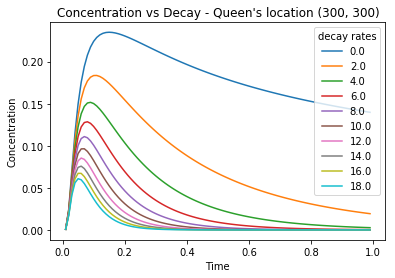

In [182]:
import matplotlib.pyplot as plt

def diffusion_eq(A, D, x, x_source, y, y_source, wb, wx, wy, t, decay_rate):
    term_1 = A / np.sqrt(t)
    dx = x - x_source
    dy = y - y_source

    term_2 = (dx - wb*wx * t)**2 + (dy - wb*wy * t)**2
    denom = ((4 * D * t)) 
    c = term_1 * (np.exp(-(term_2 / denom) - (decay_rate * t)))
    return c 

A = 0.15
D = 0.6
x, y = 0.3, 0.3
x_source, y_source = 0, 0
wb = 0
wx, wy = 0, 0 
t_array = np.arange(0.01, 1, 0.01)
decay_rate = np.arange(0.0, 19.0, 2)

for decay in decay_rate:
    C = []
    for t in t_array:
        c = diffusion_eq(A, D, x, x_source, y, y_source, wb, wx, wy, t, decay_rate=decay)
        C.append(c)
    plt.plot(t_array, C, label=str(decay))
plt.legend(loc='upper right', title="decay rates")
plt.title("Concentration vs Decay - Queen's location (300, 300)")
# plt.title("Concentration vs Decay - Queen's vicinity (340, 340)")
plt.xlabel("Time")
plt.ylabel("Concentration")